In [816]:
from pathlib import Path
from random import choice, randint
from textwrap import wrap
from io import BytesIO
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageOps
from IPython.display import display


In [817]:
FONTS = list(Path("../fonts").glob("*.ttf"))
print(f"Found {len(FONTS)} local fonts: {FONTS}")


Found 4 local fonts: [WindowsPath('../fonts/BlackOpsOne-Regular.ttf'), WindowsPath('../fonts/Blackout-Midnight.ttf'), WindowsPath('../fonts/BowlbyOneSC-Regular.ttf'), WindowsPath('../fonts/TitanOne-Regular.ttf')]


In [818]:
IMAGE_DIR = Path("../images")
IMAGE_SUBDIRS = [d for d in IMAGE_DIR.iterdir() if d.is_dir()]
print(f"Found {len(IMAGE_SUBDIRS)} local image subdirectories: {IMAGE_SUBDIRS}")


Found 1 local image subdirectories: [WindowsPath('../images/tank1')]


In [819]:
NAMES = [
    "Bridget Von Hammeries",
    "Vikita Van Go-Go",
    "Pixie Plunder Girl",
    "Candy B. Ambush",
    "Hurtz Jenasaurus",
    "Bleed Only Discomfort",
    "Salty Skoolyard",
    "Brute-E-Licious",
    "Agri-Mightya",
    "Polly Pack-a-Patty",
    "Debby Does Derbyfall",
    "Buster St.umblebear",
    "Stumblegum",
    "Loch Jess Monster",
    "FonSquishfee Gripper",
    "Slam Chowdemeannie",
    "Automaton Thunder",
]



In [820]:
COLOR_PAIRS = [
    ("#9B80B6", "#120920"),
    ("#763C04", "#92C9F6"),
    ("#F7E533", "#8415EA"),
    ("#6D2581", "#51FA8C"),
    ("#2F6269", "#A8E518"),
    ("#AA23A3", "#14FCBC"),
]


In [821]:
name = choice(NAMES)
print(f"Name: {name}")


Name: Slam Chowdemeannie


In [822]:
number = str(randint(1, 9999))
print(f"Number: {number}")


Number: 5958


In [823]:
color_pair = choice(COLOR_PAIRS)
bg_color, fg_color = color_pair
print(f"Color pair: {color_pair}")


Color pair: ('#9B80B6', '#120920')


In [824]:
font = choice(FONTS)
font_data = font.read_bytes()
print(f"Font: {font}")


Font: ..\fonts\BowlbyOneSC-Regular.ttf


In [825]:
im_scale = 0.3


In [826]:
def display_scaled(im, im_scale=im_scale):
    scaled = im.resize((int(im.width * im_scale), int(im.height * im_scale)))
    display(scaled)

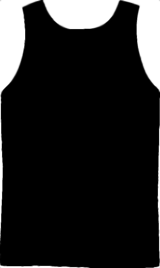

In [827]:
image_path = choice(list(IMAGE_SUBDIRS))
mask = Image.open(image_path / "mask.png")
im_gray = ImageOps.grayscale(mask)
display_scaled(im_gray)


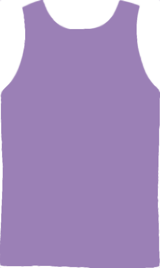

In [828]:
# colorize the jersey with our chosen name's "background" color
im_color = ImageOps.colorize(im_gray, bg_color, "white")
display_scaled(im_color)


In [829]:
max_width = im_color.width * 0.65
draw = ImageDraw.Draw(im_color)


In [830]:
def text_wrap(text, font, max_width):
    # From https://fiveminutes.today/articles/putting-text-on-images-with-python-pil/
    lines = []
    # If the width of the text is smaller than image width
    # we don't need to split it, just add it to the lines array
    # and return
    if font.getlength(text) <= max_width:
        lines.append(text)
    else:
        # split the line by spaces to get words
        words = text.split(" ")
        i = 0
        # append every word to a line while its width is shorter than image width
        while i < len(words):
            line = ""
            while i < len(words) and font.getlength(line + words[i]) <= max_width:
                line = line + words[i] + " "
                i += 1
            if not line:
                line = words[i]
                i += 1
            # when the line gets longer than the max width do not append the word,
            # add the line to the lines array
            lines.append(line.strip())
    return lines


In [831]:
name_font = ImageFont.truetype(BytesIO(font_data), 200)


In [832]:
# get size of name in our chosen font
name_width = draw.textlength(name, font=name_font)


In [833]:
# break up name into multiple lines if necessary to fit on shirt
lines = "\n".join(text_wrap(name, name_font, max_width))
lines


'Slam\nChowdemeannie'

In [834]:
name_left, name_top, name_right, name_bottom  = draw.multiline_textbbox((im_color.height * .3, im_color.width/2), lines, font=name_font, align="center")
name_width = name_right - name_left
name_height = name_bottom - name_top
print(f"Name width: {name_width}")
print(f"Name height: {name_height}")

Name width: 1821.9999999999998
Name height: 386.0


In [835]:
while name_width > max_width:
    name_font = ImageFont.truetype(BytesIO(font_data), name_font.size - 1)
    name_left, name_top, name_right, name_bottom  = draw.multiline_textbbox((im_color.height * .3, im_color.width/2), lines, font=name_font, align="center")
    name_width = name_right - name_left
    name_height = name_bottom - name_top
    print(f"Name width: {name_width}")
    print(f"Name height: {name_height}")

Name width: 1808.9999999999998
Name height: 384.0
Name width: 1803.9999999999998
Name height: 382.0
Name width: 1794.9999999999998
Name height: 380.0
Name width: 1784.9999999999998
Name height: 378.0
Name width: 1774.0
Name height: 376.0
Name width: 1766.0
Name height: 373.0
Name width: 1759.0
Name height: 371.0
Name width: 1748.0
Name height: 370.0
Name width: 1739.0
Name height: 368.0
Name width: 1730.0
Name height: 366.0
Name width: 1723.0
Name height: 365.0
Name width: 1711.0
Name height: 362.0
Name width: 1701.0
Name height: 361.0
Name width: 1695.0
Name height: 359.0
Name width: 1684.0
Name height: 357.0
Name width: 1676.0
Name height: 355.0
Name width: 1664.0
Name height: 353.0
Name width: 1658.0
Name height: 351.0
Name width: 1649.0
Name height: 349.0
Name width: 1637.0
Name height: 348.0
Name width: 1630.0
Name height: 345.0
Name width: 1621.0
Name height: 343.0
Name width: 1612.0
Name height: 342.0
Name width: 1602.0
Name height: 341.0
Name width: 1595.0
Name height: 339.0
Na

In [836]:
draw.multiline_text(((im_color.width-name_width)/2,im_color.height * .3 ), lines, font=name_font, fill=fg_color, align="center")

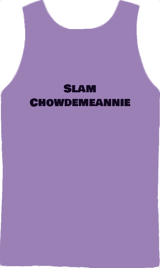

In [837]:
display_scaled(im_color)

In [838]:
NUMBER_FONT_SIZE = 200


In [839]:
number_font = ImageFont.truetype(BytesIO(font_data), NUMBER_FONT_SIZE)


In [840]:
number_width = draw.textlength(str(number), font=number_font)


In [841]:
while number_width > max_width:
    NUMBER_FONT_SIZE = NUMBER_FONT_SIZE - 10
    number_font = ImageFont.truetype(BytesIO(font_data), NUMBER_FONT_SIZE)
    number_width = draw.textlength(number, font=number_font)


In [842]:
# once number text will fit on shirt, add it to the image
draw.text(
    ((im_color.width - number_width) / 2, name_bottom), number, fill=fg_color, font=number_font
)


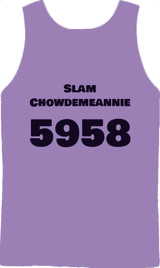

In [843]:
display_scaled(im_color)

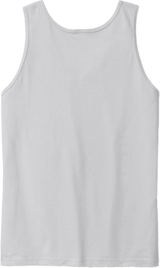

In [844]:
im_overlay = Image.open(image_path / "overlay.png")
display_scaled(im_overlay)

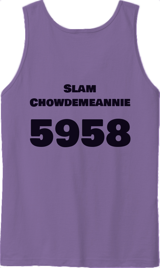

In [845]:
im_final = ImageChops.multiply(im_color, im_overlay)
display_scaled(im_final)